<a href="https://colab.research.google.com/github/Gan4x4/CV-HSE2019/blob/master/Change_model_structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
resnet18 = torchvision.models.resnet18(pretrained=True, progress=True)


--2019-12-09 16:11:12--  http://findmybike.eu/images/16/file
Resolving findmybike.eu (findmybike.eu)... 51.255.173.134
Connecting to findmybike.eu (findmybike.eu)|51.255.173.134|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205402 (201K) [image/jpeg]
Saving to: ‘/content/bike.jpg’

/content/bike.jpg   100%[===================>] 200.59K   451KB/s    in 0.4s    

2019-12-09 16:11:12 (451 KB/s) - ‘/content/bike.jpg’ saved [205402/205402]

--2019-12-09 16:11:14--  https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.109.117
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.109.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35363 (35K) [application/octet-stream]
Saving to: ‘labels.json’

labels.json         100%[===================>]  34.53K  --.-KB/s    in 0.06s   

2019-12-09 16:11:14 (555 KB/s) - ‘labels.json’ saved [35363/35363]



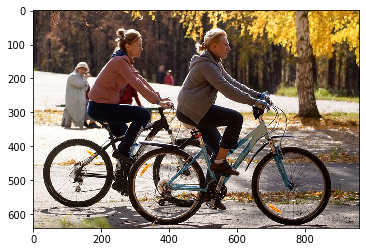

In [0]:
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
import json
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline

# Download sample image
! wget -O "/content/bike.jpg" https://raw.githubusercontent.com/Gan4x4/CV-HSE2019/master/data/2bikes.jpeg

# Store it in Pillow format and show it
pil_image = Image.open("/content/bike.jpg")
imshow(pil_image)

# Download ImageNet labels file
! wget -O labels.json https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json
with open("labels.json") as json_file:
    labels = json.load(json_file)

In [0]:
print(resnet18)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
# Classify grayscale image

resnet18.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model = resnet18

transform = transforms.Compose([
                                transforms.Grayscale(), #Transform to grayscale
                                transforms.ToTensor()])
tensor_image =transform(pil_image).unsqueeze(0)

# Switch model to evalution mode
model.eval()

# Run model
output = model(tensor_image)

# Display Top 5 class names
top_class_indexes = np.argsort(output[0].detach().numpy())[-5:]
for i in np.flip(top_class_indexes):
  print (labels[str(i)][1])

nematode
lampshade
spotlight
barn_spider
tick
